<a href="https://www.kaggle.com/code/rautaishwarya/prediction-using-hybrid-nn-xgboost-model?scriptVersionId=150236217" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Predicting Smoker Status with Bio-Signals

## Introduction

Smoking remains a significant global health concern, contributing to a multitude of diseases and adverse health outcomes. In this Kaggle competition, we delve into the realm of bio-signals to address the challenge of predicting an individual's smoker status. The dataset provided encompasses a rich array of biological signals, offering a unique opportunity to explore the intricate relationship between these signals and smoking habits.

### The Challenge

The task at hand involves binary prediction - determining whether an individual is a smoker or a non-smoker based on the bio-signals available in the dataset. This not only poses a critical public health question but also requires a nuanced understanding of how physiological markers correlate with smoking behavior.

### The Dataset

Our dataset is a treasure trove of bio-signals, providing insights into various physiological aspects. From heart rate variability to respiratory patterns, the data invites participants to leverage their data science skills to uncover patterns and features that can discriminate between smokers and non-smokers. As we navigate through this competition, the goal is to develop robust models capable of generalizing well to new, unseen data.

### Key Objectives

1. **Feature Engineering:** Explore and extract relevant features from the bio-signals that may be indicative of smoking status.
2. **Model Development:** Employ machine learning algorithms to build predictive models that can discern between smokers and non-smokers.
3. **Interpretability:** Gain insights into the biological factors influencing the predictions, enhancing our understanding of the relationship between bio-signals and smoking behavior.

### Why It Matters

The implications of successful predictions extend beyond the confines of the competition. Accurate identification of smoker status through bio-signals can inform targeted interventions, aiding in public health campaigns and personalized health strategies.

In this notebook, we embark on the journey of exploring, analyzing, and modeling bio-signals to contribute valuable insights to the field of health analytics. Let the exploration begin!

# Import and Install Necessary Libraries

In [1]:
pip install scikeras

  Obtaining dependency information for scikeras from https://files.pythonhosted.org/packages/5d/fa/9c1967952e7889d698f10ba8b6af79dfaa2e05178d97a79fbd9d1b44e589/scikeras-0.12.0-py3-none-any.whl.metadata
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import ExtraTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix
from imblearn.over_sampling import SMOTE
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from scikeras.wrappers import KerasClassifier
pd.pandas.set_option("display.max_columns",None)

# Load Data

In [3]:
file_path_test = "/kaggle/input/playground-series-s3e24/test.csv"
file_path_train = "/kaggle/input/playground-series-s3e24/train.csv"

df_train = pd.read_csv(file_path_train)
df_test = pd.read_csv(file_path_test)

train=df_train.copy()
test=df_test.copy()

train.drop(columns="id",axis=1,inplace=True)
test.drop(columns="id",axis=1,inplace=True)

In [4]:
train.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,55,165,60,81.0,0.5,0.6,1,1,135,87,94,172,300,40,75,16.5,1,1.0,22,25,27,0,1
1,70,165,65,89.0,0.6,0.7,2,2,146,83,147,194,55,57,126,16.2,1,1.1,27,23,37,1,0
2,20,170,75,81.0,0.4,0.5,1,1,118,75,79,178,197,45,93,17.4,1,0.8,27,31,53,0,1
3,35,180,95,105.0,1.5,1.2,1,1,131,88,91,180,203,38,102,15.9,1,1.0,20,27,30,1,0
4,30,165,60,80.5,1.5,1.0,1,1,121,76,91,155,87,44,93,15.4,1,0.8,19,13,17,0,1


In [5]:
test.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
0,40,165,70,84.0,1.2,1.2,1,1,130,89,107,200,186,49,115,14.2,1,0.9,19,25,32,0
1,80,160,60,93.0,1.0,1.0,2,2,144,72,93,172,158,35,104,13.0,1,1.1,20,12,24,0
2,60,170,70,86.5,0.6,0.7,1,1,117,75,92,161,173,39,88,15.4,1,1.4,38,60,36,0
3,40,160,50,67.0,0.3,0.4,1,1,116,62,91,213,47,75,128,14.5,1,0.6,25,18,10,1
4,40,170,75,89.4,1.0,0.9,1,1,132,94,79,170,100,39,123,16.5,1,1.0,30,39,27,1


In [6]:
train.info(),test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   age                  159256 non-null  int64  
 1   height(cm)           159256 non-null  int64  
 2   weight(kg)           159256 non-null  int64  
 3   waist(cm)            159256 non-null  float64
 4   eyesight(left)       159256 non-null  float64
 5   eyesight(right)      159256 non-null  float64
 6   hearing(left)        159256 non-null  int64  
 7   hearing(right)       159256 non-null  int64  
 8   systolic             159256 non-null  int64  
 9   relaxation           159256 non-null  int64  
 10  fasting blood sugar  159256 non-null  int64  
 11  Cholesterol          159256 non-null  int64  
 12  triglyceride         159256 non-null  int64  
 13  HDL                  159256 non-null  int64  
 14  LDL                  159256 non-null  int64  
 15  hemoglobin       

(None, None)

In [7]:
train.isnull().sum(), test.isnull().sum()

(age                    0
 height(cm)             0
 weight(kg)             0
 waist(cm)              0
 eyesight(left)         0
 eyesight(right)        0
 hearing(left)          0
 hearing(right)         0
 systolic               0
 relaxation             0
 fasting blood sugar    0
 Cholesterol            0
 triglyceride           0
 HDL                    0
 LDL                    0
 hemoglobin             0
 Urine protein          0
 serum creatinine       0
 AST                    0
 ALT                    0
 Gtp                    0
 dental caries          0
 smoking                0
 dtype: int64,
 age                    0
 height(cm)             0
 weight(kg)             0
 waist(cm)              0
 eyesight(left)         0
 eyesight(right)        0
 hearing(left)          0
 hearing(right)         0
 systolic               0
 relaxation             0
 fasting blood sugar    0
 Cholesterol            0
 triglyceride           0
 HDL                    0
 LDL                   

Based on the information above, we observe that all the features in the dataset are numerical, and there are no missing values present in both the training and testing datasets.

# Exploratory Data Analysis

# * Target Feature Distribution 

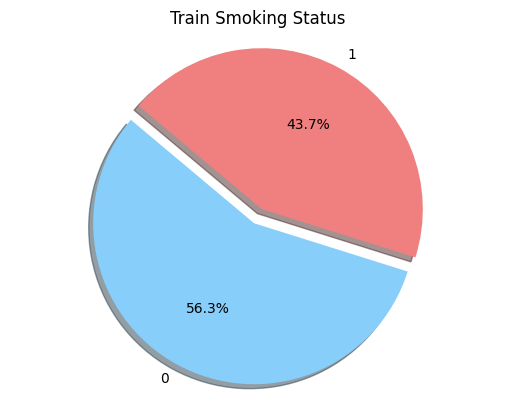

In [8]:
data_counts=train["smoking"].value_counts()
label=data_counts.index
size=data_counts.values
colors=[ "lightskyblue", "lightcoral"]
explode=(0.1,0)

plt.pie(size,explode=explode,labels=label,colors=colors,autopct="%1.1f%%",shadow=True,startangle=140)
plt.axis("equal")
plt.title("Train Smoking Status")
plt.show()

The above distribution indicates an imbalance in the smoking column, with approximately 56.3% of the data labeled as 0 (non-smokers) and 43.7% labeled as 1 (smokers). This imbalance could have implications for model training and evaluation. Here's an interpretation of this class distribution:

**Class Imbalance:** The fact that non-smokers (class 0) constitute a larger portion (56.3%) of the dataset compared to smokers (class 1, 43.7%) suggests an inherent class imbalance. In machine learning tasks, class imbalance can impact the performance of models, as algorithms might be biased towards the majority class.

**Model Sensitivity:** Because of the class imbalance, a model might exhibit a bias towards predicting the majority class. In this context, the model may become more sensitive to detecting non-smokers than smokers. As a result, its ability to correctly identify smokers (class 1) might be relatively lower.

# * Numerical Feature Distribution against Target Feature

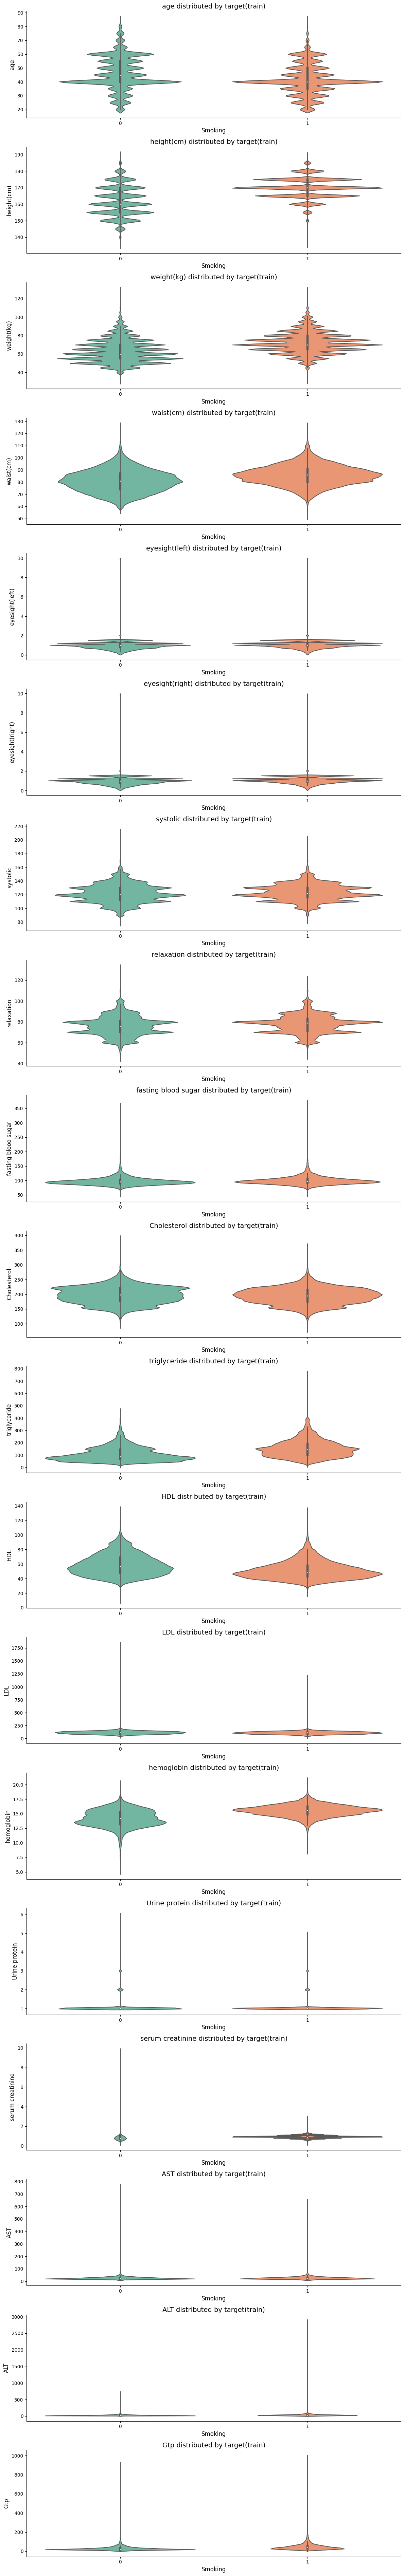

In [9]:
cont_cols = [f for f in train.columns if train[f].dtype != 'O' and train[f].nunique() > 2]
nrow=len(cont_cols)
sns.set_palette("Set2")
plt.figure(figsize=(12, 4*nrow))
for i, col in enumerate(cont_cols):
    plt.subplot(nrow,1,i+1)
    sns.violinplot(x="smoking",y=col,data=train)
    plt.title(f"{col} distributed by target(train)",fontsize=14)
    plt.ylabel(col,fontsize=12)
    plt.xlabel("Smoking",fontsize=12)
    sns.despine()
    
plt.tight_layout()
plt.show()

# * Distribution Difference between Train and Test data

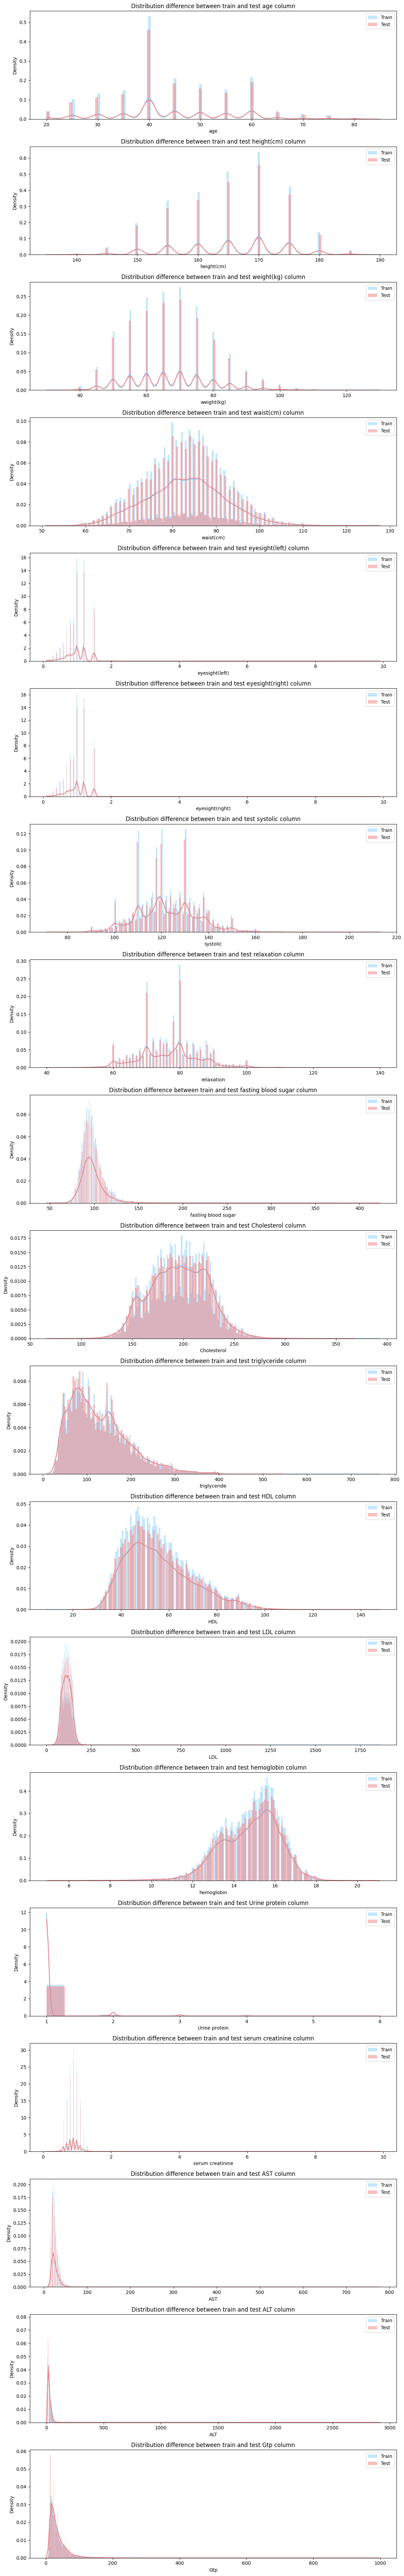

In [10]:
plt.figure(figsize=(12, 4 * nrow))

for i, col in enumerate(cont_cols):
    plt.subplot(nrow, 1, i + 1)
    plt.title(f"Distribution difference between train and test {col} column")
    
    sns.histplot(train[col], label="Train", kde=True, color="lightskyblue", stat="density", linewidth=0)
    sns.histplot(test[col], label="Test", kde=True, color="lightcoral", stat="density", linewidth=0)
    
    plt.legend()

plt.tight_layout() 
plt.show()


The matching distribution of smoking status in both the training and test datasets suggests that the datasets are consistent and representative of each other regarding this target variable. This similarity is advantageous for model development, as it implies that patterns learned during training are likely to apply well to the test set, promoting generalizability.

# Feature Engineering

New features based on the existing columns that we have. Here are some new features using the given columns:

1. **Body Mass Index (BMI):**
   - BMI is a commonly used measure of body fat based on height and weight.

2. **Waist-to-Height Ratio:**
   - This ratio is a measure of abdominal obesity and can be calculated as the ratio of waist circumference to height.

3. **Adjusting Hearing(left) and Hearing(right):**

   - It identifies the best hearing as the smaller value between the two.
   - It identifies the worst hearing as the larger value between the two.
   - It subtracts 1 from the best and worst hearing values.
    - Finally, it updates the hearing(left) and hearing(right) columns in the DataFrame.

4. **Adjusting Eyesight(left) and Eyesight(right):**

    - The code first checks if the values in eyesight(left) and eyesight(right) are greater than 9.
    - If they are, it replaces those values with 0.
    - It then follows a similar approach as with hearing, identifying the best and worst eyesight values.
    - Finally, it updates the eyesight(left) and eyesight(right) columns in the DataFrame.

5. **Cholesterol Ratios:**
   - Calculate cholesterol ratios, such as the Total Cholesterol to HDL ratio and LDL to HDL ratio.

6. **Blood Pressure Category:**
   - Create a categorical variable indicating blood pressure categories (e.g., normal, high, low).

7. **Kidney Function Index:**
   - Combine serum creatinine and urinary protein levels to create an index for kidney function.

8. **Liver Enzyme Ratio:**
   - Create a ratio of AST to ALT or Gtp to assess liver function.

In [11]:
# Freatures
def new_features(df):
# Body Mass Index (BMI)
    df["BMI"]=df["weight(kg)"]/((df["height(cm)"]/100)**2)

# Waist-to-Height Ratio
    df["waist_height_ratio"]=df["waist(cm)"]/df["height(cm)"]
    
# Best and Worst eyesight
    df['eyesight(left)'] = np.where(df['eyesight(left)'] > 9, 0, df['eyesight(left)'])
    df['eyesight(right)'] = np.where(df['eyesight(right)'] > 9, 0, df['eyesight(right)'])
    best = np.where(df['eyesight(left)'] < df['eyesight(right)'], 
                    df['eyesight(left)'],  df['eyesight(right)'])
    worst = np.where(df['eyesight(left)'] < df['eyesight(right)'], 
                     df['eyesight(right)'],  df['eyesight(left)'])
    df['eyesight(left)'] = best
    df['eyesight(right)'] = worst
    
# Best and Worst Hearing
    best = np.where(df['hearing(left)'] < df['hearing(right)'], 
                    df['hearing(left)'],  df['hearing(right)'])
    worst = np.where(df['hearing(left)'] < df['hearing(right)'], 
                     df['hearing(right)'],  df['hearing(left)'])
    best_hearing = train[['hearing(left)', 'hearing(right)']].max(axis=1)
    worst_hearing = train[['hearing(left)', 'hearing(right)']].min(axis=1)
    
    df['hearing(left)'] = best - 1
    df['hearing(right)'] = worst - 1

# Cholesterol_HDL Ratios
    df["cholesterol_hdl_ratio"]=df["Cholesterol"]/df["HDL"]

# LDL_HDL Ratios
    df["LDL_HDL_ratio"]=df["LDL"]/df["HDL"]

# Blood Pressure Category
    df["blood_pressure_cat"]=pd.cut(df["systolic"],bins=[90,120,140,160,180,200],
                                   labels=["Normal","Elevated","High_stage_1","High_stage_2","Hypertensive_crisis"])

# Kidney Function Index
    df["Kidney_function_index"]=df["serum creatinine"]*df["Urine protein"]

# Liver Enzyme Ratio
    df['AST_to_ALT_Ratio'] = df['AST'] / df['ALT']

    df['Gtp_to_AST_Ratio'] = df['Gtp'] / df['AST']
    
    return df

train=new_features(train)
test=new_features(test)

In [12]:
train.tail()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking,BMI,waist_height_ratio,cholesterol_hdl_ratio,LDL_HDL_ratio,blood_pressure_cat,Kidney_function_index,AST_to_ALT_Ratio,Gtp_to_AST_Ratio
159251,40,155,45,69.0,1.5,2.0,0,0,127,80,64,238,47,72,159,14.5,1,0.8,25,26,13,0,0,18.730489,0.445161,3.305556,2.208333,Elevated,0.8,0.961538,0.520000
159252,50,155,75,82.0,1.0,1.0,0,0,120,80,89,213,202,64,108,14.5,1,0.6,21,20,18,0,0,31.217482,0.529032,3.328125,1.687500,Normal,0.6,1.050000,0.857143
159253,40,160,50,66.0,1.0,1.5,0,0,114,70,84,189,45,87,93,10.9,1,0.6,15,9,12,0,0,19.531250,0.412500,2.172414,1.068966,Normal,0.6,1.666667,0.800000
159254,50,165,75,92.0,1.0,1.2,0,0,121,90,122,165,148,55,80,14.4,1,1.1,22,17,37,0,1,27.548209,0.557576,3.000000,1.454545,Elevated,1.1,1.294118,1.681818
159255,40,145,45,76.4,1.0,1.2,0,0,125,87,83,186,87,87,81,14.0,1,0.8,21,16,17,0,0,21.403092,0.526897,2.137931,0.931034,Elevated,0.8,1.312500,0.809524


## Label Encoding 

In [13]:
# Perform Label Encoding on Blood Pressure Category
le=LabelEncoder()
train["blood_pressure_cat"]=le.fit_transform(train["blood_pressure_cat"])
test["blood_pressure_cat"]=le.fit_transform(test["blood_pressure_cat"])

In [14]:
# Drop Unwanted Columns
train.drop(columns=["height(cm)","weight(kg)","waist(cm)","systolic","Cholesterol",
                   "HDL","LDL","Urine protein","serum creatinine","AST","ALT","Gtp"],
           axis=1,inplace=True)

test.drop(columns=["height(cm)","weight(kg)","waist(cm)","systolic","Cholesterol",
                   "HDL","LDL","Urine protein","serum creatinine","AST","ALT","Gtp"],
           axis=1,inplace=True)

## Data Standardization

In [15]:
# Standardize the train and test data
sc=StandardScaler()
x=train.drop(columns=["smoking"],axis=1)
y=train["smoking"]

x_scaled =sc.fit_transform(x)
test_scaled=sc.transform(test)

## Feature Importance

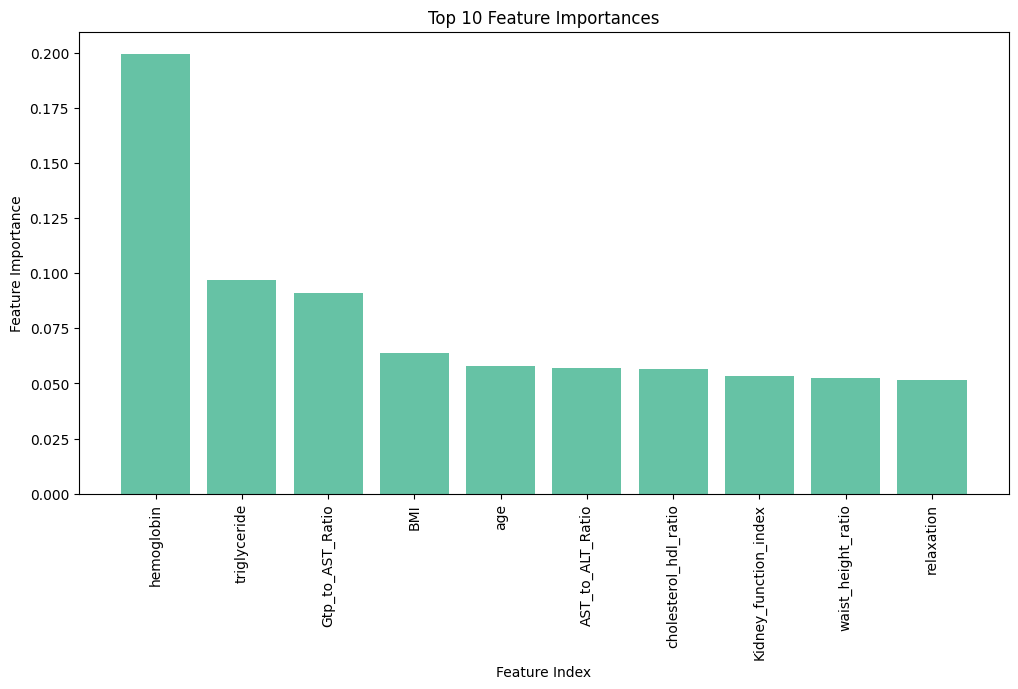

In [16]:
# Create and fit the ExtraTreeClassifier model
forest = ExtraTreeClassifier(random_state=7)
forest.fit(x_scaled , y)

importances = forest.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

feature_names = x.columns
top_feature_names = feature_names[sorted_indices[:10]]

# Plot Important 10 features
plt.figure(figsize=(12, 6))
plt.bar(range(len(top_feature_names)), importances[sorted_indices[:10]], align='center')
plt.xticks(range(len(top_feature_names)), top_feature_names,rotation=90)
plt.xlabel('Feature Index')
plt.ylabel('Feature Importance')
plt.title('Top 10 Feature Importances')
plt.show()

Using ExtraTreeClassifier, we've pinpointed the most important features that greatly influence how well the model makes predictions. Understanding feature importance helps us grasp what factors matter most, making our model more understandable and effective in making decisions.

# Modeling (Hybrid model- ANN+ XGBOOST model)

We created a dynamic narrative using a Hybrid model that blends the strengths of an Artificial Neural Network (ANN) with the strategic prowess of XGBoost. This superhero duo collaborates seamlessly, making our data exploration both powerful and engaging. The Hybrid model not only predicts outcomes effectively. 

In [17]:
# Apply SMOTE to the training set
smote = SMOTE(sampling_strategy='auto', random_state=42)
x_resampled, y_resampled = smote.fit_resample(x_scaled, y)

x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=7)
# Define a function to create the neural network model
def create_nn_model():
    model = Sequential()
    model.add(Dense(128, input_dim=x_train.shape[1],kernel_initializer='he_uniform', activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(64,kernel_initializer='he_uniform', activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(32,kernel_initializer='he_uniform', activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(1,kernel_initializer='he_uniform', activation='sigmoid'))  

    # Compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Create KerasClassifier wrapper for scikit-learn compatibility
nn_model = KerasClassifier(build_fn=create_nn_model, epochs=10, batch_size=32, verbose=1)

# Create and fit the XGBoost model with class weights
xgb_model = XGBClassifier(random_state=7)
xgb_model.fit(x_train, y_train)

# Create the hybrid model using a VotingClassifier
hybrid_model = VotingClassifier(estimators=[('nn', nn_model), ('xgb', xgb_model)], voting='soft')

# Fit the hybrid model
hybrid_model.fit(x_train, y_train)

# Predictions
y_proba_test = hybrid_model.predict_proba(x_test)[:, 1]

# Calculate and print AUC
auc = roc_auc_score(y_test, y_proba_test)
print("AUC on Test Set:", auc)

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
4481/4481 [==============================] - 12s 2ms/step - loss: 0.5066 - accuracy: 0.7524
Epoch 2/10
4481/4481 [==============================] - 9s 2ms/step - loss: 0.4874 - accuracy: 0.7642
Epoch 3/10
4481/4481 [==============================] - 10s 2ms/step - loss: 0.4829 - accuracy: 0.7677
Epoch 4/10
4481/4481 [==============================] - 10s 2ms/step - loss: 0.4793 - accuracy: 0.7693
Epoch 5/10
4481/4481 [==============================] - 9s 2ms/step - loss: 0.4771 - accuracy: 0.7710
Epoch 6/10
4481/4481 [==============================] - 9s 2ms/step - loss: 0.4749 - accuracy: 0.7721
Epoch 7/10
4481/4481 [==============================] - 9s 2ms/step - loss: 0.4740 - accuracy: 0.7731
Epoch 8/10
4481/4481 [==============================] - 9s 2ms/step - loss: 0.4725 - accuracy: 0.7731
Epoch 9/10
4481/4481 [==============================] - 10s 2ms/step - loss: 0.4712 - accuracy: 0.7749
Epoch 10/10
1121/1121 [==============================] - 1s 1ms/step
AUC on Te

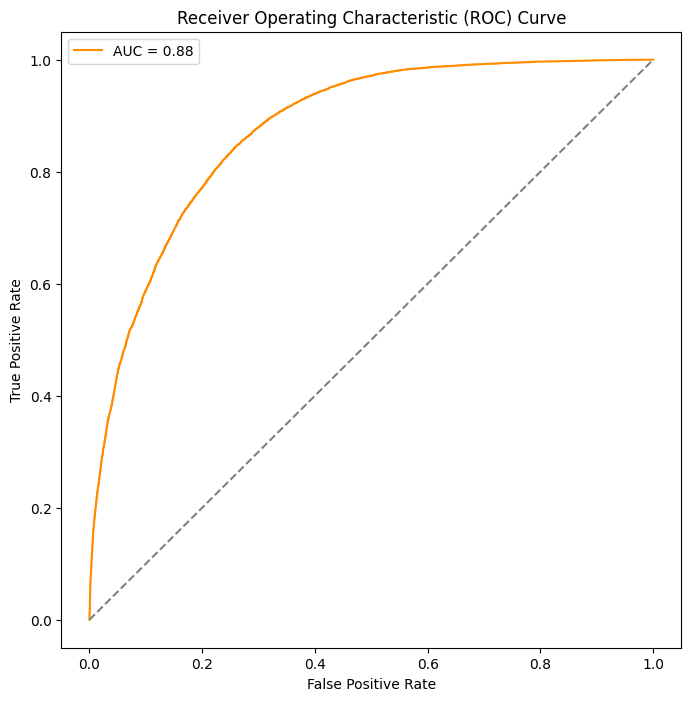

In [18]:
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba_test)
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}',color="darkorange")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

1121/1121 [==============================] - 1s 1ms/step


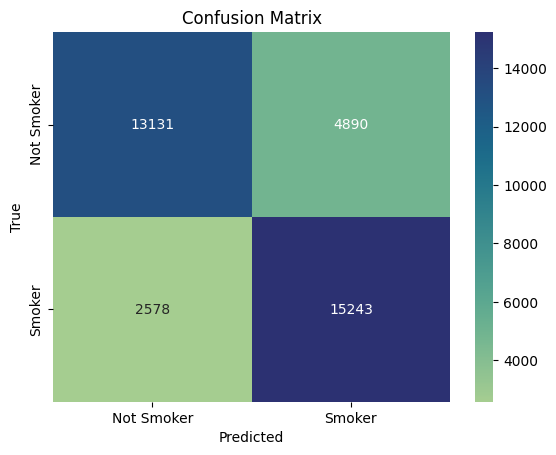

In [19]:
y_pred_train = hybrid_model.predict(x_test)
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_train)
sns.heatmap(cm, annot=True, fmt="d", cmap="crest", xticklabels=['Not Smoker', 'Smoker'], yticklabels=['Not Smoker', 'Smoker'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [20]:
# Predict Probabilities and Smoking Class
y_pred_test = hybrid_model.predict(test_scaled)
y_pred_prob_test=hybrid_model.predict_proba(test_scaled)[:,1]
y_pred_prob_test

3318/3318 [==============================] - 4s 1ms/step


array([0.71284056, 0.23032391, 0.4807114 , ..., 0.48158312, 0.0527308 ,
       0.0124404 ], dtype=float32)

# Submission

In [21]:
# Submit the Probabilities
sample_sub = pd.DataFrame({'id': df_test['id'], 'smoking': y_pred_prob_test})
sample_sub.to_csv('sample_submission.csv', index=False)
sample_sub

,id,smoking
0,159256,0.712841
1,159257,0.230324
2,159258,0.480711
3,159259,0.041899
4,159260,0.629925
...,...,...
106166,265422,0.604342
106167,265423,0.650684
106168,265424,0.481583
106169,265425,0.052731


**If you like this notebook, then please don't forgot to upvote.**

**Thank You!**